Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the Biker data set

In [625]:
# Import necessary libraries
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [626]:
# Read the data set
biker = pd.read_csv(r"C:\Users\shama\OneDrive\Documents\MLandAI\Casestudy\Biker\day.csv")
biker.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [627]:
biker.shape

(730, 16)

In [628]:
# Step to find the missing values
# Luckly no missing values
biker.info()
100*biker.isnull().sum()/biker.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [629]:
biker.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Now that we have read the data and also got a basic understanding we will now visulise the data so we get to know the relationship with the each data points.
We need to understand if cnt is having any linear relationship with other variables
We should see if we have multi lineraity

# Step3: Cleaning Data

Drop columns that are not useful for analysis
1. instant is just a row indecating instant
2. dteday is removed as we have some of the date features like mnth and year already in other columns, and also for analysis we are not considering date and month
3. casual and registered can be removed since target = casual + registered.

In [633]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business

In [634]:
biker.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [635]:
# Dropping instant column nothing to do with target
biker.drop(['instant'], axis = 1, inplace = True)
# Dropping dteday as we have month and week column
biker.drop(['dteday'],axis = 1,inplace = True)

# Dropping casual and registered columns as we have cnt
biker.drop(['casual'], axis = 1,inplace = True)
biker.drop(['registered'], axis = 1, inplace = True)

In [636]:
biker.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [637]:
biker.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [638]:
biker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [639]:
biker.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [640]:
biker.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


Handling outliers

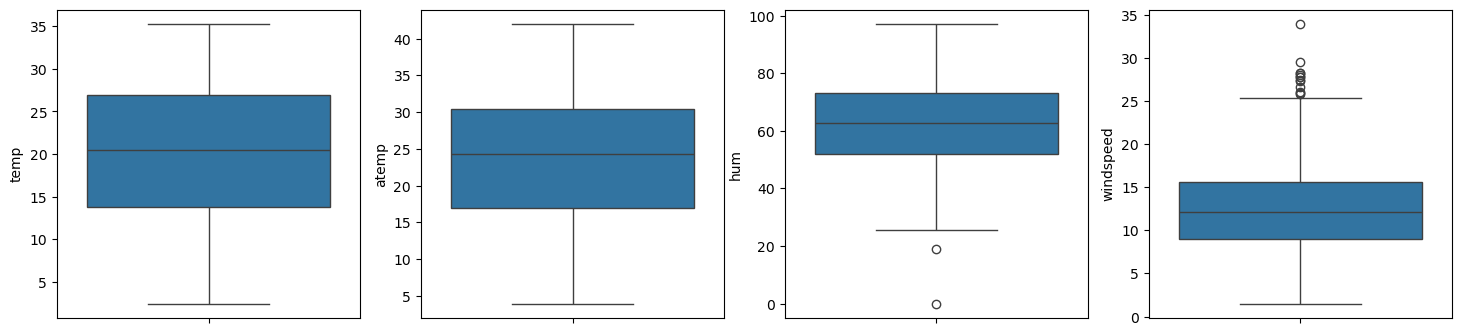

In [642]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=biker)
    i+=1

We observe no outliers in the given numeric data

Converting season, weathersit, mnt and weekday to categorical type

In [645]:
biker.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

biker.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

biker.mnth = biker.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

biker.weekday = biker.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
biker.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


Draw a pair plot to check linear relationship

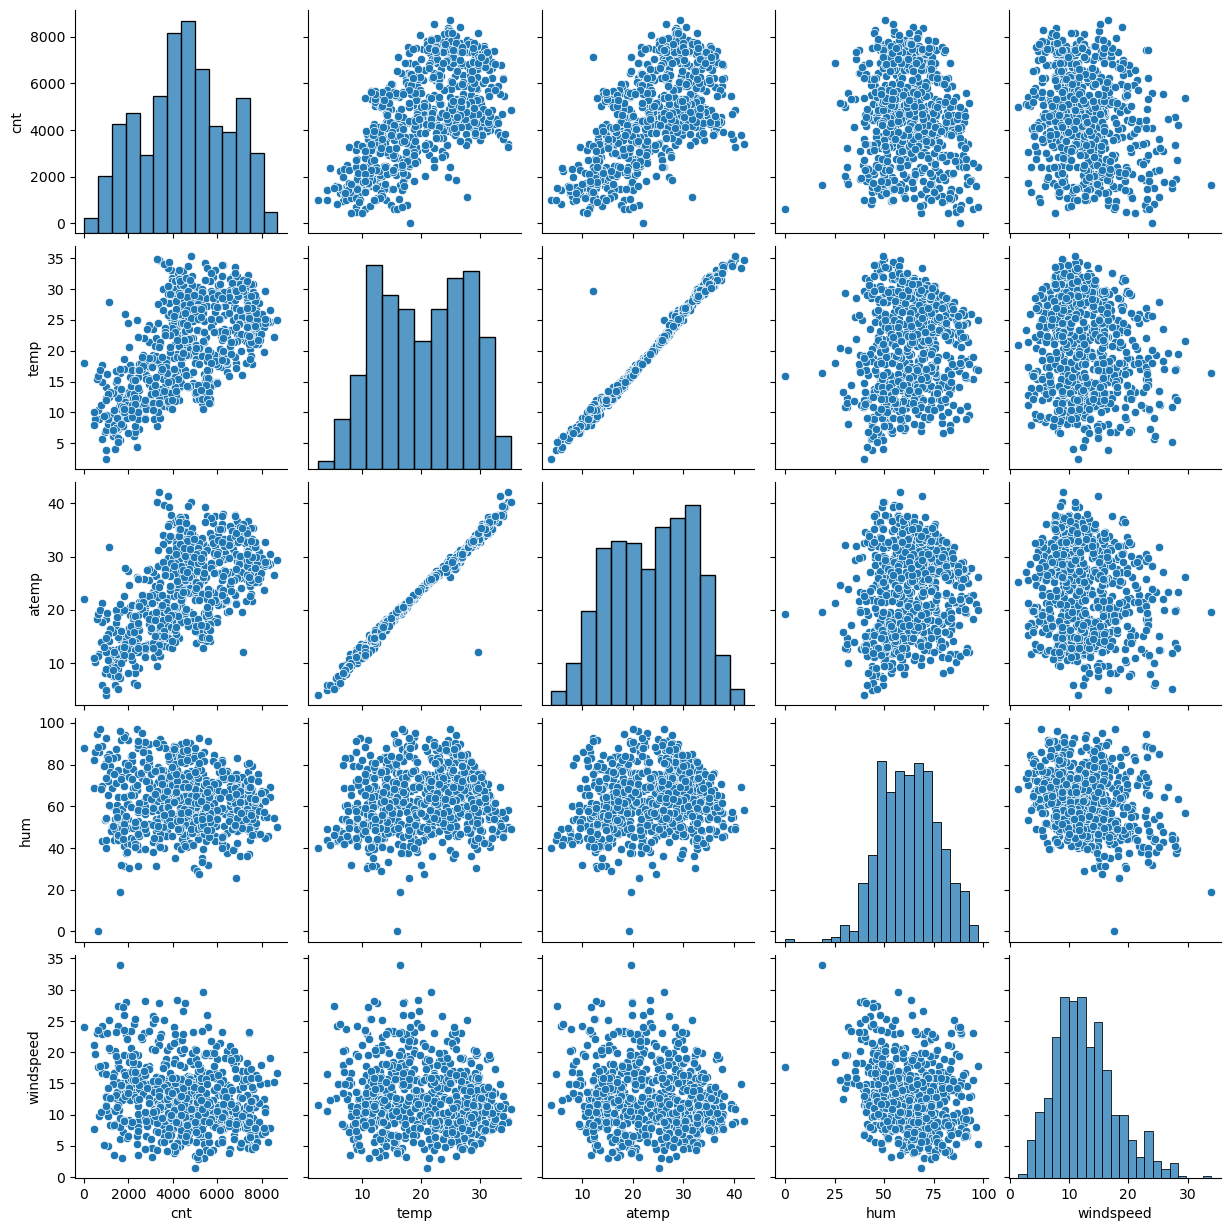

In [647]:
# Draw pair plot for numeric variables using seaborn
sns.pairplot(data=biker,vars=['cnt','temp','atemp','hum','windspeed'])
plt.show()

#### _`Inference`_: 
- Looks like the temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other
#### As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp. 

#### Let us plot heatmap to understand the correlation better

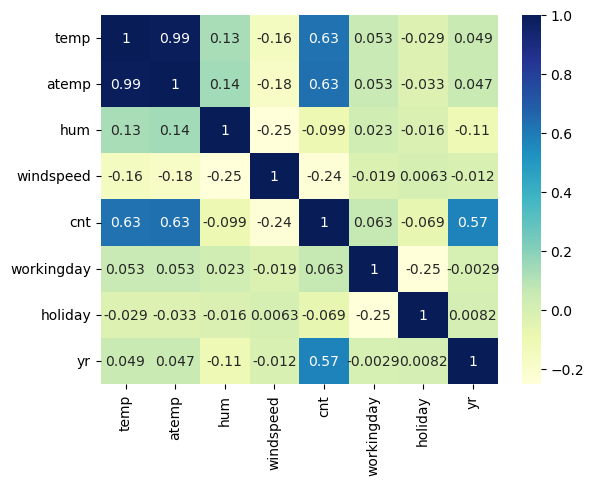

In [650]:
# Checking continuous variables relationship with each other
sns.heatmap(biker[['temp','atemp','hum','windspeed','cnt','workingday','holiday','yr']].corr(), cmap='YlGnBu', annot = True)
plt.show()

In [651]:
# Since we see a very high almost 1 corr with temp and atemp, looks like atemp is derived from temp. Hence this can be dropped

In [652]:
# biker.drop(['atemp'],axis = 1,inplace = True)

In [653]:
#Correlations for numeric variables
biker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


####  Analysing Categorical Variabels with target variables 

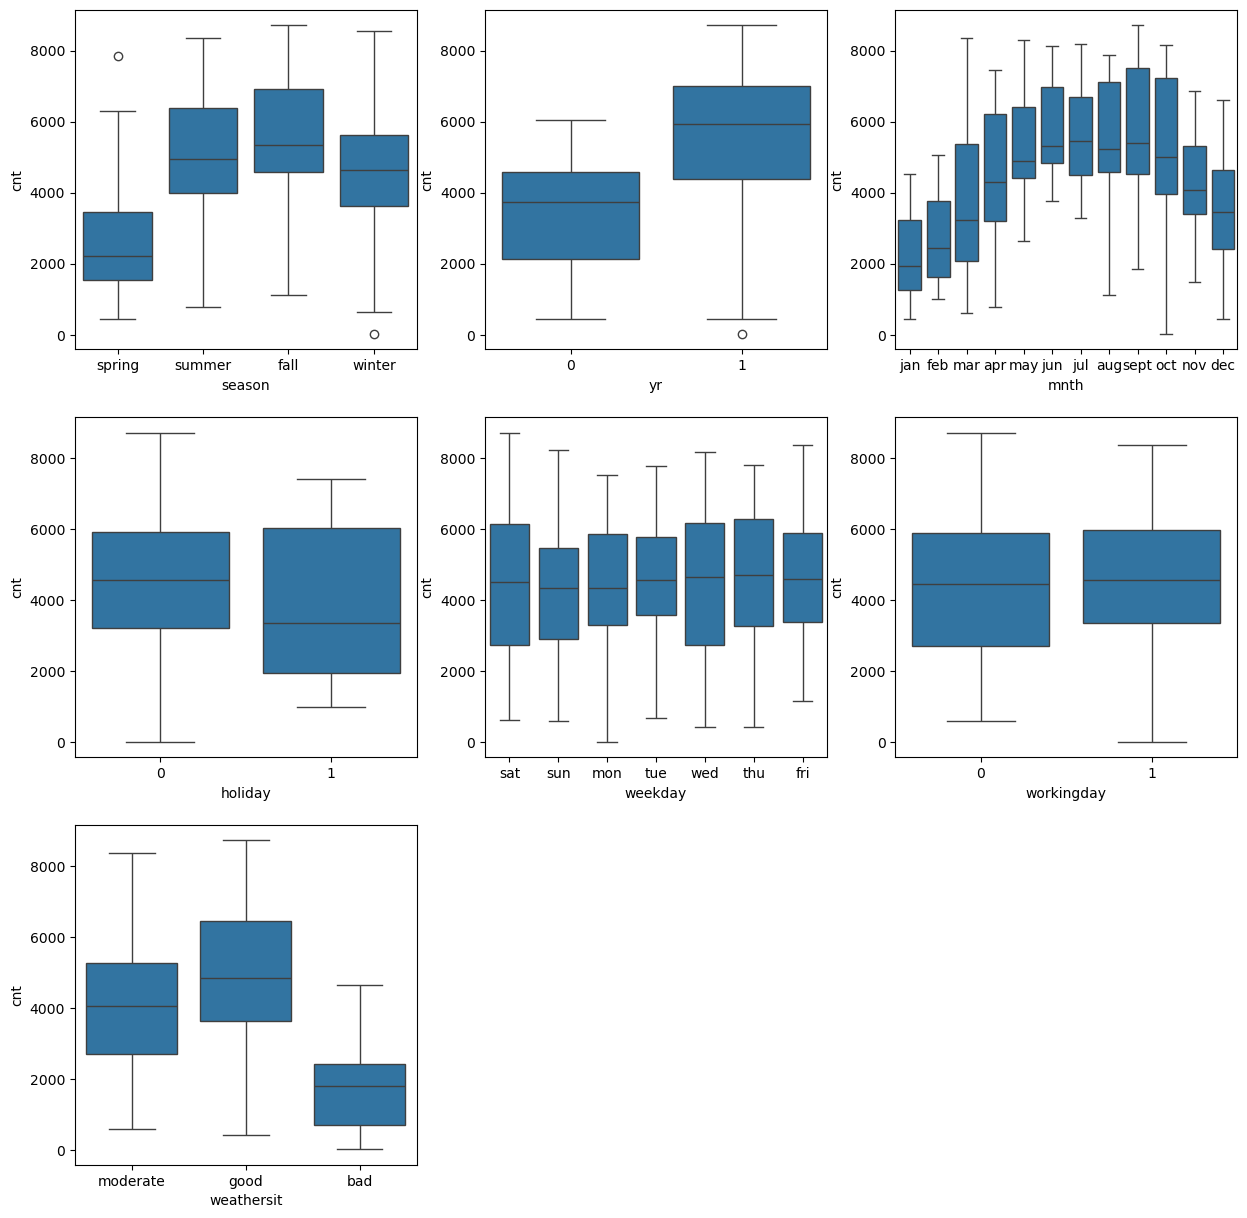

In [655]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=biker, x=i[1], y='cnt')
plt.show()

#### Inferances
1. Seasion : Fall and Summer has more demand for rental bike, where Fall being the highest
2. We see demand in 2019 increased
3. September month had the highest demand
4. From Jan to Sep we see a gradual increase in demand, and demand decreases from oct to dec
5. Working day got no much impact on the demand
6. Good weather got highest demand
7. During year end demand reduces which is similar in year start, could be due to extreme weathers.

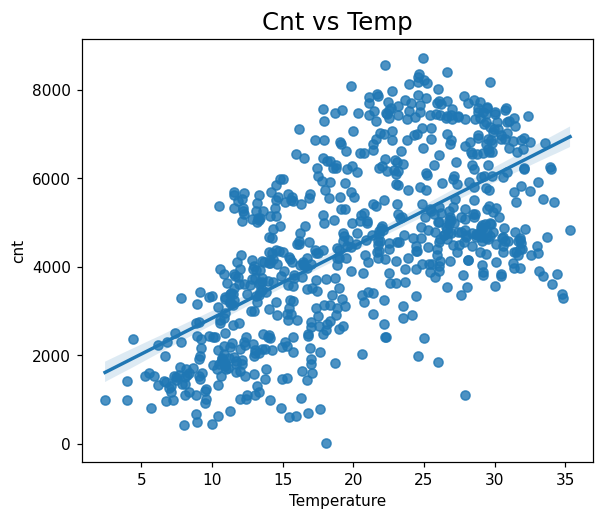

In [657]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=biker,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

#### _`Inference`_:
- Demand for bikes is positively correlated to temp.
- We can see that cnt is linearly increasing with temp indicating linear relation.

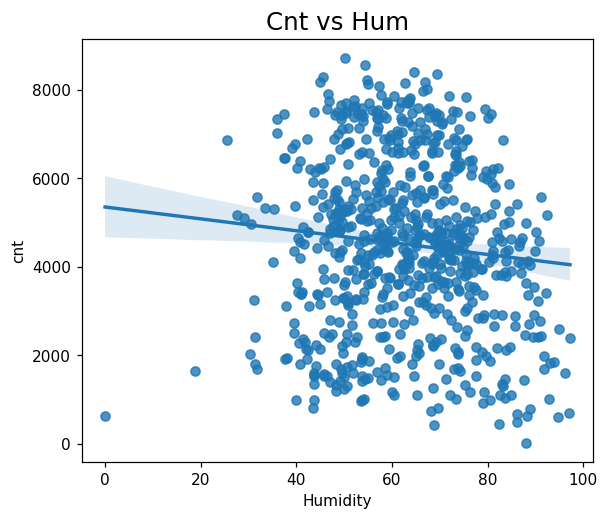

In [659]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=biker,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### _`Inference`_:
- Hum is values are more scattered around.
- Although we can see cnt decreasing with increase in humidity.

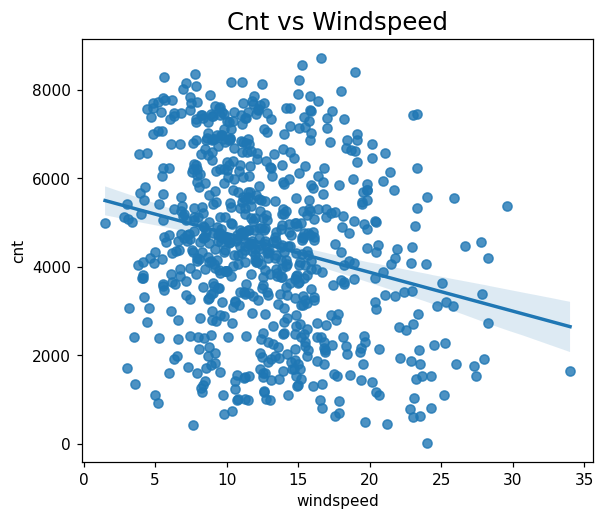

In [661]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=biker,y="cnt",x="windspeed")
plt.show()

#### _`Inference`_:
- Windspeed is values are more scattered around.
- Although we can see cnt decreasing with increase in windspeed.

# Data Preparation for Linear Regression 

Create dummy variables for all categorical variables

In [665]:
# Yes and No varaibles
# ['yr','workingday','holiday'] no need to map since they are already in 0's and 1's
# Create dummy variables for 3 or more categorical levels
biker = pd.get_dummies(data=biker,columns=["season","mnth","weekday"],dtype=int,drop_first=True)
biker = pd.get_dummies(data=biker,columns=["weathersit"],dtype=int)


Note in weather list 1st column was not dropped, to keep all the information


In [667]:
# biker = pd.concat([biker,status],axis=1)

In [668]:
biker.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


In [669]:
biker.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [670]:
biker.shape

(730, 31)

In [671]:
#  y for target vraiable
y = biker.pop('cnt')

# X for all remaning variables
X = biker

# train test set split with 70:30
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

Rescalling of the data set: It is extermely imp to work on rescalling for multi linear regression, since the scale of hum and workday will have a significat diffrence in value we need to rescale.
We have two types of rescalling
1. Min Max scalling (normalisation) Between 0 and 1
2. Standardisation ( Mean 0, sigma 1)
normalisation: (x - xmin)/(xmax -xmin)
standarisation: (x-mu)/sigma

In [673]:
scaler = MinMaxScaler()
# we should scale only numeric varables
num_vars = ['temp','atemp','hum','windspeed']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [674]:
X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 653 to 520
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   511 non-null    int64  
 1   holiday              511 non-null    int64  
 2   workingday           511 non-null    int64  
 3   temp                 511 non-null    float64
 4   atemp                511 non-null    float64
 5   hum                  511 non-null    float64
 6   windspeed            511 non-null    float64
 7   season_spring        511 non-null    int32  
 8   season_summer        511 non-null    int32  
 9   season_winter        511 non-null    int32  
 10  mnth_aug             511 non-null    int32  
 11  mnth_dec             511 non-null    int32  
 12  mnth_feb             511 non-null    int32  
 13  mnth_jan             511 non-null    int32  
 14  mnth_jul             511 non-null    int32  
 15  mnth_jun             511 non-null    int32 

Training the model

Build a Model using 2nd approach which is adding all the featuers and then elemenating one by one

Function to calculate VIFs and print them

#### _`Inference`_:
We will consider P value and VIF to drop featuers

##  VIF calculation VIF = 1/1-R2
Let us consider safe VIF is when its value is <5
Case 1: We could have high P value and high VIF which should be dropped
Case 2: We can have High p value and 
Case 3: low VIF or low P value and high VIF
Case 4: Low P and low VIF
in case 2 and 3: We remove high P low VIF since the onces which have high VIF can be reduced when we eleminate case 2

In [680]:
# Importing required library

In [681]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [682]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,step = 15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), step=15)

In [683]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 2),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_aug', False, 2),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 2),
 ('mnth_mar', False, 2),
 ('mnth_may', False, 2),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 2),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 2),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 2),
 ('weekday_tue', False, 2),
 ('weekday_wed', False, 2),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

Manual elimination

In [685]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(X_train):
    X_train_sm = sm.add_constant(X_train)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [686]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(X_train):
    df1 = X_train
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [687]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [688]:
# printing and saving selected columns after RFE.
selected_columns = X_train.columns[rfe.support_]
print('Dropped Columns: ',list(X_train.columns[~rfe.support_]))
print('Selected Columns: ',list(selected_columns))

Dropped Columns:  ['atemp', 'season_spring', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed']
Selected Columns:  ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_good', 'weathersit_moderate']


Model 1 - Start with all variables selected by RFE

In [690]:
X_train_rfe = X_train[selected_columns]

In [691]:
#Selected columns for Model 1 - all columns selected by RFE
build_model(X_train_rfe)
get_vif(X_train_rfe)
X_train_rfe.describe()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.7
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.24e-182
Time:                        00:45:57   Log-Likelihood:                -4141.5
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     497   BIC:                             8370.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 700.7847    

,yr,holiday,workingday,temp,hum,windspeed,season_winter,mnth_jan,mnth_jul,mnth_sept,weekday_sat,weekday_sun,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.650333,0.320844,0.248532,0.088063,0.076321,0.080235,0.154599,0.142857,0.029354,0.626223,0.344423
std,0.500412,0.157613,0.468042,0.225640,0.145741,0.169639,0.432585,0.283664,0.265771,0.271923,0.361876,0.350270,0.168963,0.484280,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.538858,0.199179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.653499,0.298098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754401,0.414438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


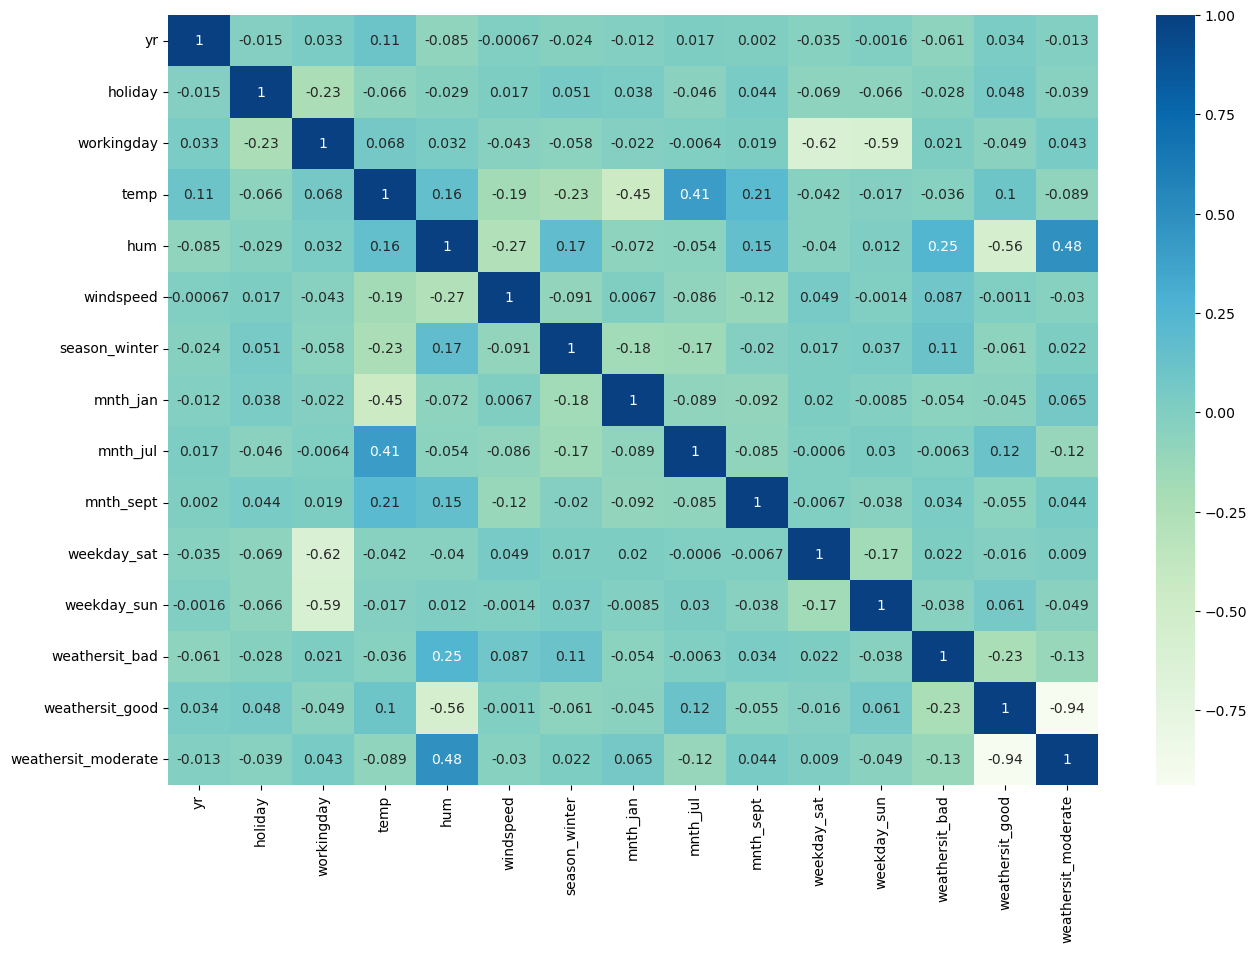

In [692]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(X_train_rfe.corr(), cmap='GnBu', annot=True)
plt.show()

In [693]:
# Let us drop holiday   since it is having high P value
X_train_rfe.drop("weekday_sun",inplace=True,axis='columns')

In [694]:
build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.7
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.24e-182
Time:                        00:45:58   Log-Likelihood:                -4141.5
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     497   BIC:                             8370.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 780.0721    

In [695]:
# Let us drop weathersit_good since it is having very high VIF
X_train_rfe.drop("weathersit_good",inplace=True,axis='columns')
build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.7
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.24e-182
Time:                        00:45:58   Log-Likelihood:                -4141.5
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     497   BIC:                             8370.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1907.2203    

In [696]:
# Let us drop hum  since it is having very high VIF
X_train_rfe.drop("hum",inplace=True,axis='columns')
build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     197.2
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.17e-180
Time:                        00:45:58   Log-Likelihood:                -4149.6
No. Observations:                 511   AIC:                             8325.
Df Residuals:                     498   BIC:                             8380.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1137.1087    

In [697]:
# Let us drop workingday since it is having very high VIF
X_train_rfe.drop("workingday",inplace=True,axis='columns')
build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     207.9
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.22e-178
Time:                        00:45:58   Log-Likelihood:                -4157.2
No. Observations:                 511   AIC:                             8338.
Df Residuals:                     499   BIC:                             8389.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1462.0097    

In [698]:
# Let us drop windspeed   since it is having very high VIF
X_train_rfe.drop("windspeed",inplace=True,axis='columns')
build_model(X_train_rfe)
get_vif(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     211.0
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.85e-172
Time:                        00:45:58   Log-Likelihood:                -4174.4
No. Observations:                 511   AIC:                             8371.
Df Residuals:                     500   BIC:                             8417.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 845.7678    

In [699]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'season_winter', 'mnth_jan', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate'],
      dtype='object')

In [700]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [701]:
#Let us build the finalmodel using sklearn
cols = X_train_rfe.columns

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

845.7677658339303 [ 2020.75855823  -919.78536348  5120.23080881   849.7557919
  -508.19484696  -646.38548193   603.53270371   138.9675582
 -2601.38018249  -642.90460887]


In [702]:
y_train_pred = lr.predict(X_train[cols])

In [703]:
r2_score(y_train,y_train_pred)

0.8084101760694054

In [704]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

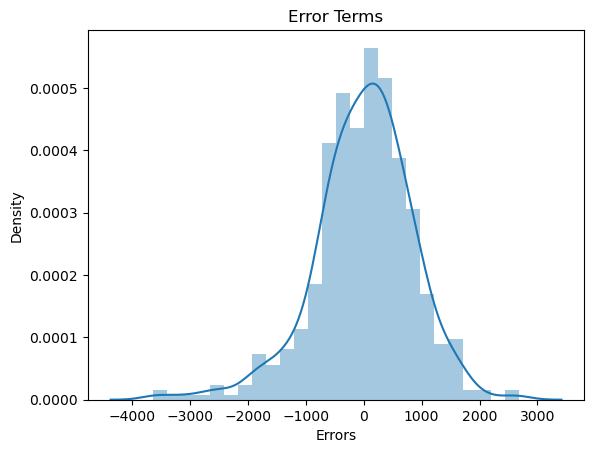

In [705]:
plot_res_dist(y_train, y_train_pred)

In [706]:
r2_score(y_train,y_train_pred)

0.8084101760694054

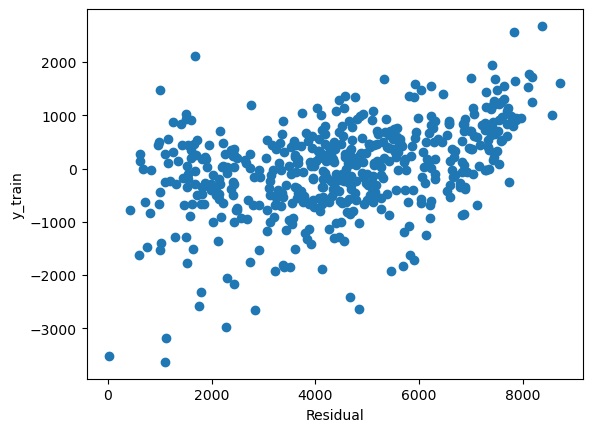

In [707]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

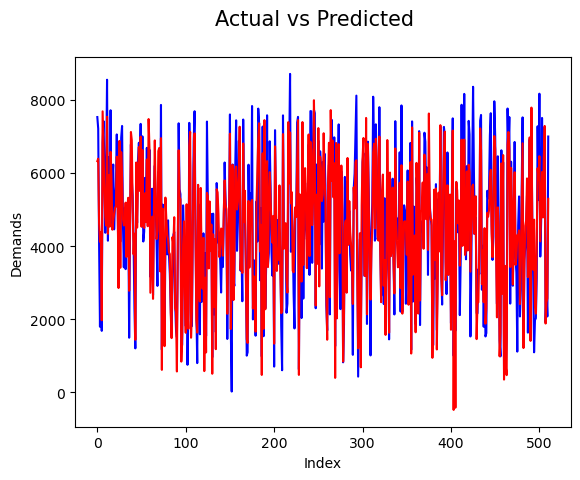

In [708]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

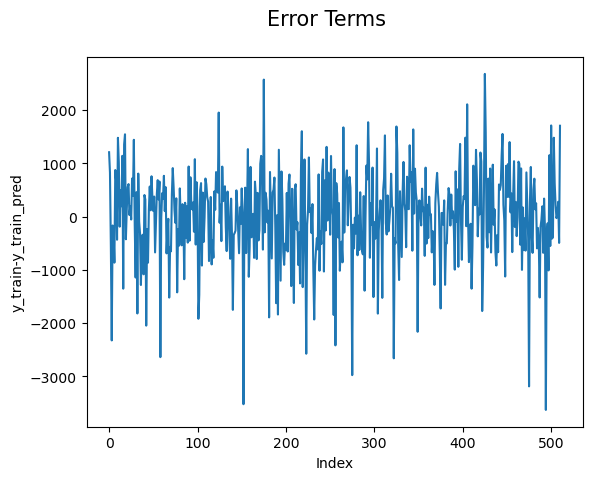

In [709]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

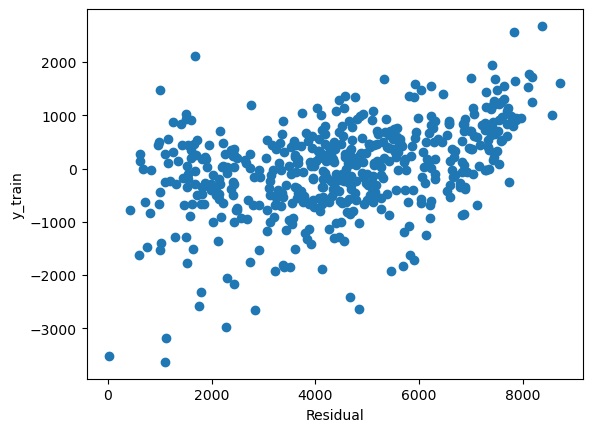

In [710]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [711]:
#Predict the values for test data
# Fit on the training data set
# Transform on test data set
X_test_sm = sm.add_constant(X_test)
X_test_sm[num_vars] = scaler.fit_transform(X_test_sm[num_vars])
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
184,1.0,0,1,0,0.837241,0.778767,0.534223,0.149393,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1.0,1,0,1,0.911423,0.855132,0.470417,0.231142,0,1,...,0,0,0,0,0,0,1,0,1,0
299,1.0,0,0,1,0.496221,0.492359,0.777843,0.443398,0,0,...,0,0,0,0,1,0,0,0,0,1
221,1.0,0,0,1,0.890387,0.805661,0.236659,0.449707,0,0,...,0,0,0,0,0,0,1,0,1,0
152,1.0,0,0,1,0.821739,0.749249,0.070765,0.682387,0,1,...,0,0,0,0,1,0,0,0,1,0


In [712]:
y_test_pred = lr.predict(X_test_sm[cols])

In [713]:
R2 = r2_score(y_test,y_test_pred)

In [714]:
R2

0.7796565851804391

In [715]:
# Let us find adjusted r2 
Adj= 1-(1-R2)*(X_test_sm.size-1)/(X_test_sm.size-cols.size-1)

In [716]:
Adj

0.7793314989974655

-Adj R2 and R2 is same
-Test R2 is 0.8 and test R2 is .78 approax, which is a good fit

In [718]:
###  Plot Test vs Predicted test values

In [719]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

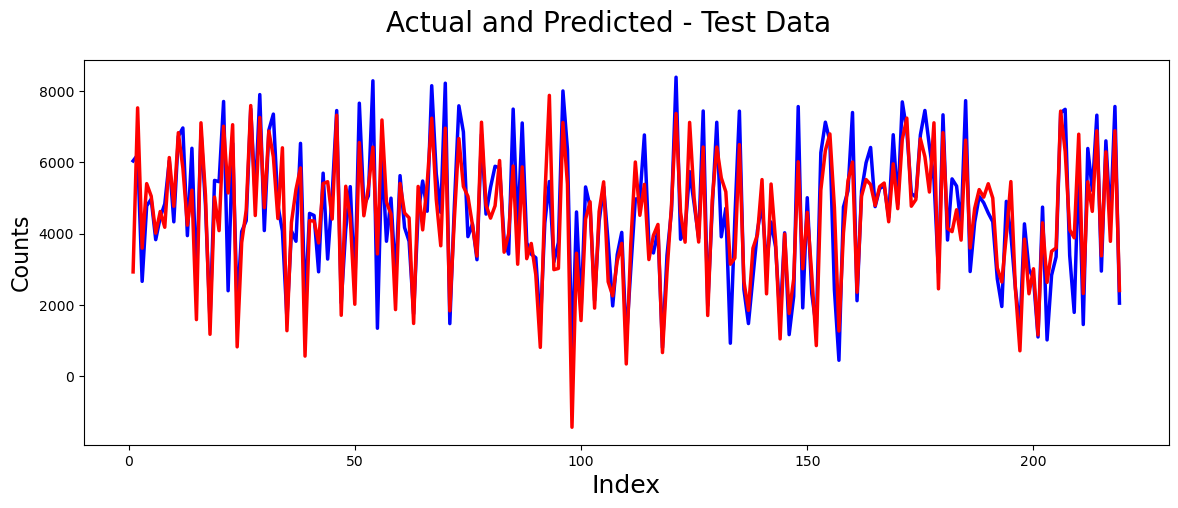

In [720]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

#### _`Inference`_
As we can see predictions for test data is very close to actuals

### _`Conclusion`_
Significant variables to predict the demand for shared bikes
- holiday
- temp
- hum
- Season
- months(January, July, September)
- Year (2019)
- Sat
- weathersit bad

### Area to improve
- Sales during spring needs to be improved
- We see a dep in sale end of year, but this might be due to extreme weather (September month had the highest demand)
- 2019 sales have improved compared to 2018, so it is expected to increase next year
- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.